In [68]:
# Data Analysis and Manipulation 
import pandas as pd
import numpy as np
# Data Visualization
import matplotlib.pyplot as plt


In [85]:
df = pd.read_excel('onlineretail2.xlsx')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [86]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [87]:
# Convert to show date only
from datetime import datetime
df_fix["InvoiceDate"] = df_fix["InvoiceDate"].dt.date

AttributeError: Can only use .dt accessor with datetimelike values

In [89]:
# Create TotalSum colummn
df_fix["TotalSum"] = df_fix["Quantity"] * df_fix["UnitPrice"]

In [90]:
# Create date variable that records recency
import datetime
snapshot_date = max(df_fix.InvoiceDate) + datetime.timedelta(days=1)
# Aggregate data by each customer
customers = df_fix.groupby(['CustomerID']).agg({
    'InvoiceDate': lambda x: (snapshot_date - x.max()).days,
    'InvoiceNo': 'count',
    'TotalSum': 'sum'})
# Rename columns
customers.rename(columns = {'InvoiceDate': 'Recency',
                            'InvoiceNo': 'Frequency',
                            'TotalSum': 'MonetaryValue'}, inplace=True)

In [91]:
df_fix.head()
customers.head()


,Recency,Frequency,MonetaryValue
CustomerID,,,
12347.0,3,5,81.60
12349.0,19,1,19.90
12353.0,205,1,39.80
12354.0,233,2,25.45
12356.0,326,1,50.00


<Axes: xlabel='MonetaryValue', ylabel='Count'>

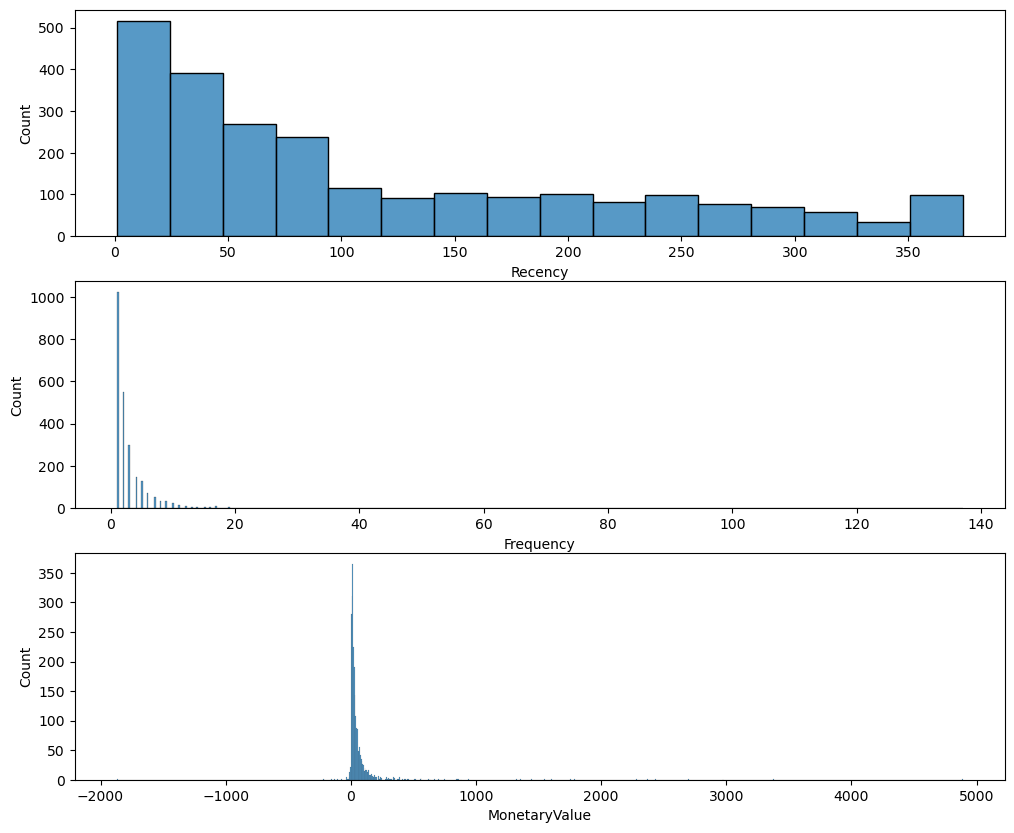

In [92]:
import seaborn as sns

# Checking the distribution of Recency, Frequency and MonetaryValue variables.
plt.figure(figsize=(12,10))
# Plot distribution of var1
plt.subplot(3, 1, 1); sns.histplot(customers['Recency'])
# Plot distribution of var2
plt.subplot(3, 1, 2); sns.histplot(customers['Frequency'])
# Plot distribution of var3
plt.subplot(3, 1, 3); sns.histplot(customers['MonetaryValue'])

<Axes: xlabel='MonetaryValue', ylabel='Count'>

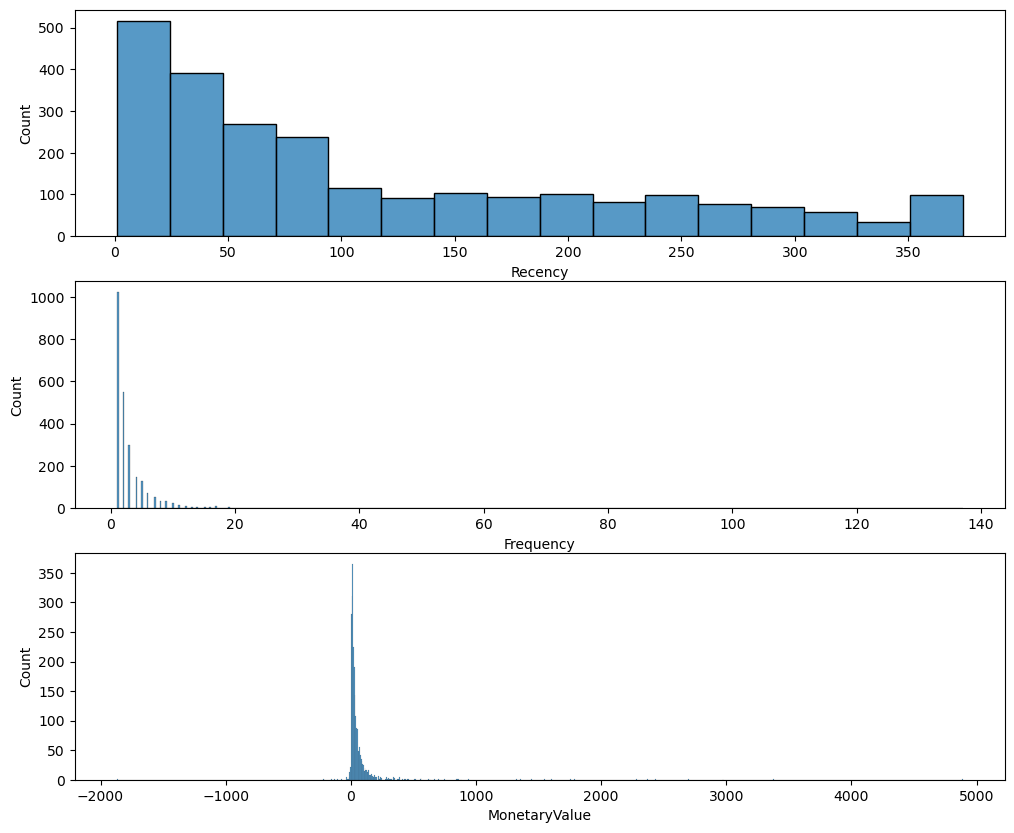

In [32]:

# Checking the distribution of Recency, Frequency and MonetaryValue variables.
plt.figure(figsize=(12,10))
# Plot distribution of var1
plt.subplot(3, 1, 1); sns.histplot(customers['Recency'])
# Plot distribution of var2
plt.subplot(3, 1, 2); sns.histplot(customers['Frequency'])
# Plot distribution of var3
plt.subplot(3, 1, 3); sns.histplot(customers['MonetaryValue'])

In [76]:
from scipy import stats
customers_fix = pd.DataFrame()
customers_fix["Recency"] = stats.boxcox(customers['Recency'])[0]
customers_fix["Frequency"] = stats.boxcox(customers['Frequency'])[0]
customers_fix["MonetaryValue"] = pd.Series(np.cbrt(customers['MonetaryValue'])).values
customers_fix.tail()

,Recency,Frequency,MonetaryValue
2428,5.144506,1.021167,4.861252
2429,6.148622,0.564199,4.091635
2430,1.272970,0.798349,3.737290
2431,1.671379,1.253008,3.013275
2432,11.514709,0.000000,2.482545


In [93]:
customers_fix.describe()

,Recency,Frequency,MonetaryValue
count,2433.000000,2433.000000,2433.000000
mean,8.102080,0.476252,3.115834
std,3.591132,0.446920,1.687705
min,0.000000,0.000000,-12.315388
25%,5.486780,0.000000,2.314589
50%,7.926984,0.564199,2.915023
75%,11.291499,0.798349,3.758647
max,14.198961,1.545452,16.970340


In [94]:
# Import library
from sklearn.preprocessing import StandardScaler
# Initialize the Object
scaler = StandardScaler()
# Fit and Transform The Data
scaler.fit(customers_fix)
customers_normalized = scaler.transform(customers_fix)
# Ensure that it has mean 0 and variance 1
print(customers_normalized.mean(axis = 0).round(2)) 
print(customers_normalized.std(axis = 0).round(2)) 

[-0. -0. -0.]
[1. 1. 1.]


In [79]:
customers_normalized.describe()

AttributeError: 'numpy.ndarray' object has no attribute 'describe'

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

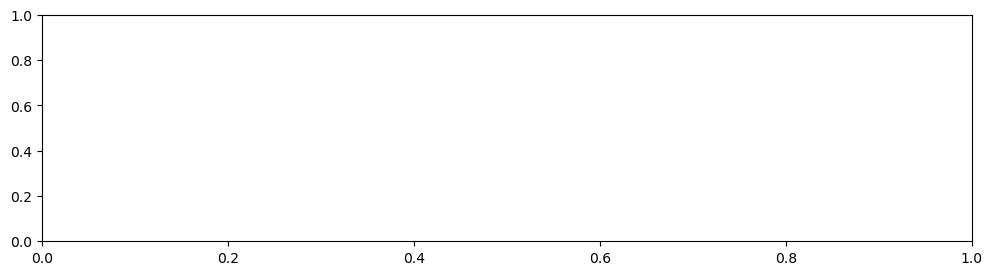

In [51]:

# Checking the distribution of Recency, Frequency and MonetaryValue variables.
plt.figure(figsize=(12,10))
# Plot distribution of var1
plt.subplot(3, 1, 1); sns.histplot(customers_normalized['Recency'])
# Plot distribution of var2
plt.subplot(3, 1, 2); sns.histplot(customers_fix['Frequency'])
# Plot distribution of var3
plt.subplot(3, 1, 3); sns.histplot(customers_fix['MonetaryValue'])

C:\Users\zeeza\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\zeeza\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=10.
  warnings.warn(
C:\Users\zeeza\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\zeeza\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environm

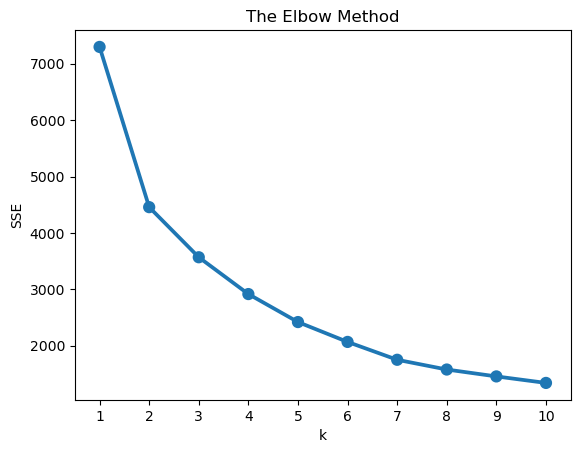

In [95]:
from sklearn.cluster import KMeans
sse = {}
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(customers_normalized)
    sse[k] = kmeans.inertia_ # SSE to closest cluster centroid
plt.title('The Elbow Method')
plt.xlabel('k')
plt.ylabel('SSE')
sns.pointplot(x=list(sse.keys()), y=list(sse.values()))
plt.show()

In [98]:
model = KMeans(n_clusters=4, random_state=42)
model.fit(customers_normalized)
model.labels_.shape

C:\Users\zeeza\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\zeeza\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=10.
  warnings.warn(


(2433,)

In [97]:
customers["Cluster"] = model.labels_
customers.groupby('Cluster').agg({
    'Recency':'mean',
    'Frequency':'mean',
    'MonetaryValue':['mean', 'count']}).round(2)

Recency Frequency MonetaryValue      
           mean      mean          mean count
Cluster                                      
0        159.61      2.84         45.68   630
1         38.29      1.39         18.39   626
2        231.49      1.03         14.50   598
3         29.57      7.27        170.75   579

In [84]:
# Create the dataframe
df_normalized = pd.DataFrame(customers_normalized, columns=['Recency', 'Frequency', 'MonetaryValue'])
df_normalized['ID'] = customers.index
df_normalized['Cluster'] = model.labels_
# Melt The Data
df_nor_melt = pd.melt(df_normalized.reset_index(),
                      id_vars=['ID', 'Cluster'],
                      value_vars=['Recency','Frequency','MonetaryValue'],
                      var_name='Attribute',
                      value_name='Value')
df_nor_melt.head()


,ID,Cluster,Attribute,Value
0,12347.0,3,Recency,-1.902050
1,12349.0,1,Recency,-1.020610
2,12353.0,2,Recency,0.967009
3,12354.0,0,Recency,1.113190
4,12356.0,2,Recency,1.520798


<Axes: xlabel='Attribute', ylabel='Value'>

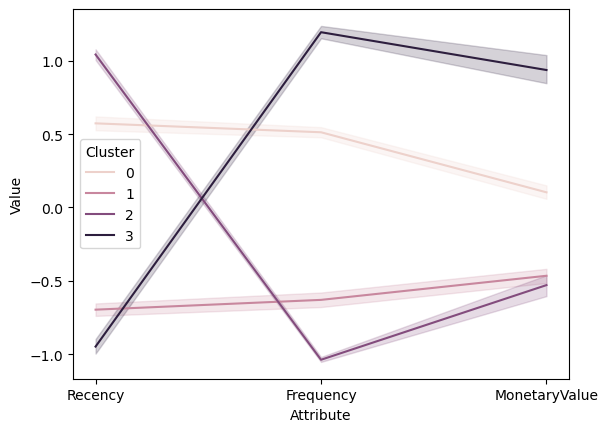

In [62]:
sns.lineplot(x='Attribute', y='Value', hue='Cluster', data=df_nor_melt)